---
# <span style="color:pink">DS3000B - DS9000B Final Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired throughout the term.

- Use of chatbots, *e.g.*, ChatGPT, is prohibited.

- You are allowed to use any document and source on your computer and the internet, but you are **not** allowed to share documents, post questions to online forums (this includes use of homework helpers such as Chegg), or communicate in any way with people inside or outside the venue.

- Having any communication tools (*e.g.*, Discord, Teams, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the exam in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

- You must have your work submitted by 12:00PM today to the "Test and Quizzes" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submission will be scored with 0 mark. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

- Some questions demand a **written answer** - answer these in a full English sentence in markdown cells.

- For your figures, ensure that all axes are labeled in an informative way. To facilitate interpretation, there could be a situation where you should limit the x-axis and/or y-axis to zoom-in for clarity.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected.

## <span style="color:pink">Additional Guidance</span>

- The "Toolbox" cells offer almost every tool that you need to answer the questions, however, depending on your answers, there could be a couple of instances where you'd need to bring in more tools - unless a question imposes some restrictions.
- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.
- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with the other questions.
- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.
- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you time compared to pure mouse scrolling. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.


---
## <span style="color:orange">Data</span>

Connor Andrew McDavid is a Canadian professional ice hockey player and captain of the Edmonton Oilers of the National Hockey League (NHL). The data file `final.csv` provides a reduced version of Connor's game by game career data. Each row represents the stats of one game. The dataset has the following attributes:

|#| Attribute | Description |
| --- | --- | --- |
|0|`opposingTeam`|The team the player played against.|
|1|`home_or_away`|Whether a game was played home or away.|
|2|`icetime`|Log10 of total time the player played in seconds.|
|3|`gameScore`|Game score rating.|
|4|`I_F_primaryAssists`|Primary Assists the player has received on teammates' goals.|
|5|`I_F_secondaryAssists`|Secondary Assists the player has received on teammates' goals.|
|6|`log10_I_F_shotAttempts`|Log10 of shot attempts. Includes player's shots on goal, missed shots, and blocked shot attempts.|
|7|`I_F_goals`|Number of goals the player scored.|
|8|`I_F_rebounds`|Rebound shot attempts. These must occur within 3 seconds of a previous shot.|
|9|`I_F_reboundGoals`|Goals from rebound shot attempts.|
|10|`I_F_freeze`|Puck freezes after a player's shot. The  number of puck freezes by goalies after the player's unblocked shot attempts.|
|11|`I_F_playContinuedInZone`|Number of times the play continues in the offensive zone after the player's shot besides an immediate rebound shot.|
|12|`I_F_playContinuedOutsideZone`|Number of times the play goes outside the offensive zone after the player's shot.|
|13|`I_F_savedShotsOnGoal`|Number of the player's unblocked shots that were saved by the goalie.|
|14|`I_F_savedUnblockedShotAttempts`|Number of the player's unblocked shots that were saved by the goalie or missed the net.|
|15|`I_F_penalityMinutes`|Number of penalty minutes the player has received.|
|16|`log10_I_F_faceOffsWon`|Log10 of number of faceoffs the player has won.|
|17|`I_F_hits`|Number of hits the player has given.|
|18|`I_F_takeaways`|Number of takeaways the player has taken from opponents.|
|19|`I_F_giveaways`|Number of giveaways the player has given to other team.|
|20|`I_F_lowDangerGoals`|Goals from low danger shots.|
|21|`I_F_mediumDangerGoals`|Goals from medium danger shots.|
|22|`I_F_highDangerGoals`|Goals from high danger shots.|
|23|`I_F_unblockedShotAttempts`|All shot attempts that weren't blocked.|
|24|`I_F_dZoneGiveaways`|Giveaways in the team's defensive zone.|
|25|`penalityMinutesDrawn`|Number of penalty minutes the player has drawn.|
|26|`penaltiesDrawn`|Number of penalties the player has drawn.|

---
## <span style="color:orange">Global Toolbox</span>

In [ ]:
import pandas as pd
import numpy as np
seed = 2023 # work with this seed throughout the notebook
np.random.seed(seed)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

---
## Question 1 - <span style="color:green">[65]</span> - Supervised Learning

We want to find a model which best predicts Connor's icetime, but first we want to do some preprocessing, leading us to dimension-reduced versions of the data.

### <span style="color:orange">Q1 Toolbox</span>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

### Q1.1 - <span style="color:red">[5]</span> - Apply any data transformation you consider necessary, drop categorical attributes (if any), and create the matrix of predictors and target vector, calling them `X1` and `y`, respectively. What is the `shape` of `X1` and `y`?

In [ ]:
# Grader: The question asks for dropping categorical attributes.
# Please deduct mark if they retain them (even if encoded).

# Grader: The dataset is the same dataset used in their midterm exam.
# Bute, the data dictionary in the cell "Data" above, indicates that the
# attributes "icetime", "I_F_faceOffsWon", and "I_F_faceOffsWon" are
# already log transformed. Nevertheless, as a result of blind copy-pasting
# from the midterm solution notebook, you might see some of them yet
# re-transforming these attributes. Please deduct mark for this.

df = pd.read_csv('./final.csv')

X = df.drop(['icetime'], axis=1).copy()

numList = X.select_dtypes("number").columns
objList = X.select_dtypes("object").columns

# Grader: Please deduct mark if they do not standardize the data.
# Caveat: Some of them might do it in the next cell.
scaler = StandardScaler()
for feature in numList:
    X[[feature]] = scaler.fit_transform(X[[feature]])

X1 = X.drop(objList, axis=1)
y = df['icetime'].copy()

print('Shape of X1:', X1.shape)
print('Shape of y:', y.shape)

Shape of X1: (2725, 24)
Shape of y: (2725,)


### Q1.2 - <span style="color:red">[10]</span> - Use a 15-component regular PCA to transform `X1` and create the scree plot. Let $p$ be the **minimum** number of PCs required in order to capture at least 80% of total variance. What would be the value of $p$? Reduce the second dimension of `X1` to $p$ and call this new array `X2` (retain `X1` intact though, we need it for later).

In [1]:
n = 15
transformer1 = PCA(n)
transformer1.fit(X1)
X1_transformed = transformer1.transform(X1)

exp_var = transformer1.explained_variance_ratio_
cum_sum = np.cumsum(exp_var)

plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance ratio')
plt.step(range(0,len(cum_sum)), cum_sum, where='mid', label='Cumulative explained variance ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

numPC=10
print(f'nPC {numPC}: {np.round(sum(exp_var[0:numPC])*100,2)}%')

numPC=11
print(f'nPC {numPC}: {np.round(sum(exp_var[0:numPC])*100,2)}%')
print(f'\nThe minimum number of PCs to consider in order to capture\nat least 80% of total variance is {numPC}.')

X2 = X1_transformed[:,:numPC]

NameError: ignored

### Q1.3 - <span style="color:red">[10]</span> - This time, we want to use `KMeans` to transform and reduce the second dimension of `X1`. Transform `X1` into 16 features with the first 15 being the distances of the instances to the k centroids and the 16th being the cluster membership of the instances (*i.e.*, cluster label). Call this new array `X3`, and again keep `X1` intact as we need it for later.

In [ ]:
k=15
clusterer = KMeans(n_clusters=k, random_state=seed).fit(X1)
X3 = clusterer.transform(X1) # creating the first 15 columns
X3 = np.concatenate((X3, clusterer.labels_.reshape(-1,1)), axis=1) # adding the 16th column

### Q1.4 - <span style="color:red">[20]</span> - Now that you have 3 different design matrices (*i.e.*, `X1`, `X2`, and `X3`) let's try different scenarios: Train a simple linear regression (with default arguments) once using `X1` (*i.e.*, Model 1), another time by combining `X1` and `X2` (*i.e.*, Model 2), and finally by combining `X1`, `X2`, and `X3` (*i.e.*, Model 3). Use cross-validation with RMSE as the error measure to identify the best model. Report the generalization loss of the winning model and store its design matrix under `X_final`.

(For the cross-validation, do five-fold shuffled. For train/test split, use sklearn's default value for test set size.)

In [ ]:
# Grader: In order to rank the models, they must solely rely on the cross-validation.
# We report generalization loss only for the best model. However, do not deduct mark
# if they report generalization loss for all models as long as it was not part of their
# judgment to identify the best model.

def evaluate(model, Xtrain, Xtest, ytrain, ytest, text):
    model.fit(Xtrain, ytrain)
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring='neg_root_mean_squared_error')
    print('\n'+text)
    print('Average CV RMSE: %.4f +/- %.4f' % (-cv_scores.mean(), cv_scores.std()))


LR = LinearRegression(n_jobs=-1)

Xtrain, Xtest, ytrain, ytest = train_test_split(                X1                  , y.values, random_state=seed)
evaluate(LR, Xtrain, Xtest, ytrain, ytest, 'Model 1')

Xtrain, Xtest, ytrain, ytest = train_test_split(np.concatenate((X1, X2), axis=1)    , y.values, random_state=seed)
evaluate(LR, Xtrain, Xtest, ytrain, ytest, 'Model 2')

Xtrain, Xtest, ytrain, ytest = train_test_split(np.concatenate((X1, X2, X3), axis=1), y.values, random_state=seed)
evaluate(LR, Xtrain, Xtest, ytrain, ytest, 'Model 3')

print('\nModel 3 wins! Its generalization RMSE is %.4f.' % mean_squared_error(ytest, LR.predict(Xtest), squared=False))
X_final = np.concatenate((X1, X2, X3), axis=1)


Model 1
Average CV RMSE: 0.5708 +/- 0.0103

Model 2
Average CV RMSE: 0.5702 +/- 0.0105

Model 3
Average CV RMSE: 0.4760 +/- 0.0119

Model 3 wins! Its generalization RMSE is 0.4989.


### Q1.5 - <span style="color:red">[5]</span> - Now that you have decided your `X_final`, use it to train an `XGBRegressor` with 150 estimators and remember to use the notebook `seed`. Leave all other parameters at their default values. Report its cross-validated and generalization RMSE. Comparing to your best model in Q1.4, do you achieve a better model or worse?

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_final, y.values, random_state=seed)

xgbr = XGBRegressor(random_state=seed,
                    n_estimators=150,
                    tree_method='hist',
                    n_jobs=-1
                    )

evaluate(xgbr, Xtrain, Xtest, ytrain, ytest, 'XGBRegressor')
print('Generalization RMSE is %.4f.' % mean_squared_error(ytest, xgbr.predict(Xtest), squared=False))
print('\nLoss decreased further. This is a better model.')


XGBRegressor
Average CV RMSE: 0.3564 +/- 0.0162
Generalization RMSE is 0.3693.

Loss decreased further. This is a better model.


### Q1.6 - <span style="color:red">[15]</span> - Now, we want to see if we can make the Xgboost regressor any better. Use the cross-validated grid search function to find the best possible values for `max_depth`, and `learning_rate` for the Xgboost regressor. Here are the degrees of freedom to use: for `max_depth` try `[2, 4, 6]`, and for `learning_rate` try `[0.05, 0.1, 0.2]`. Use the best parameters found and report the cross-validated and generalization RMSE of the fine-tuned Xgboost regressor. How does this model compare against all others? Why?

Note: To save time, use only 50% of data points (randomly selected from `X_final` and `y`) to fit the grid search function.

In [ ]:
params = dict({
               'max_depth':     [2, 4, 6],
               'learning_rate': [0.05, 0.1, 0.2]
              })

gs = GridSearchCV(xgbr,
                  params,              # Parameter grid
                  cv = 5,              # Cross-validation object.
                  scoring = 'neg_root_mean_squared_error',
                  n_jobs = -1,         # Parallel jobs. -1 is "all you have"
                  refit = False,       # If refit at the end with the best. We'll do it manually.
                  verbose = 0          # If to show what it is doing.
                 )

# Grader: Here I asked for random subsampling for computational efficiency.
# Please do not deduct mark if they use all data to fit GridSearchCV.
m = int(X_final.shape[0]*0.5) # 50% of rows
idx = np.random.randint(X_final.shape[0], size=m)

gs.fit(X_final[idx,:], y.values[idx])


xgbr2 = XGBRegressor( max_depth=gs.best_params_.get('max_depth'),
                      learning_rate=gs.best_params_.get('learning_rate'),
                      n_estimators=150,
                      random_state=seed,
                      tree_method='hist',
                      n_jobs=-1
                    )

evaluate(xgbr2, Xtrain, Xtest, ytrain, ytest, 'Fine Tuned XGBRegressor')
print('Generalization RMSE is %.4f.' % mean_squared_error(ytest, xgbr2.predict(Xtest), squared=False))


Fine Tuned XGBRegressor
Average CV RMSE: 0.3193 +/- 0.0160
Generalization RMSE is 0.3319.


In [ ]:
print('\nThis model has the lowest loss and therefore is the best model. XGboost has built-in\n\
regularization which by default is l2. Tuning the regressor involves searching for the best\n\
combination of hyperparameters using cross-validated grid search, which optimizes the model\n\
by finding the best trade-off between bias and variance tailored to the given dataset.')


This model has the lowest loss and therefore is the best model. XGboost has built-in
regularization which by default is l2. Tuning the regressor involves searching for the best
combination of hyperparameters using cross-validated grid search, which optimizes the model
by finding the best trade-off between bias and variance tailored to the given dataset.


---
## Question 2 - <span style="color:green">[35]</span> - Unsupervised Learning

We want to find out how many quality clusters are there in the data (*i.e.*, `final.csv`), and for this, in addition to the standard clustering metrics, we want to see if UMAP and t-SNE can help with the quest.

Note: Apply any data transformation you consider necessary, drop categorical attributes (if any).

### <span style="color:orange">Q2 Toolbox</span>

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import umap
import umap.plot
from sklearn.manifold import TSNE

### Q 2.1 - <span style="color:red">[12]</span> - Cluster the data using `KMeans` with `k` in $[2, 3, 4, 5, 6, 10]$. Plot reduction in variance versus `k` and silhouette score versus `k`. Solely relying on these two plots, what are the best three values that you would conclude for `k`? Why?

In [ ]:
# Grader: This is unsupervised and the therefore we won't have any target attribute.
# Please deduct mark if they create a target (y). For example, here if they work with
# X1 created in Question 1, then they are leaving out the attribute "icetime" and this
# subjects them to the same mark penalty.
# Also, please note that the question asks for dropping categorical attributes. Please
# deduct mark if they retain them (even if encoded).

df = pd.read_csv('./final.csv')

numList = df.select_dtypes("number").columns
objList = df.select_dtypes("object").columns

# Grader: Please deduct mark if they do not standardize the data.
# Caveat: Some of them might do it in the next cell.
scaler = StandardScaler()
for feature in numList:
    df[[feature]] = scaler.fit_transform(df[[feature]])

df.drop(objList, axis=1, inplace=True)
print(df.shape)

(2725, 25)


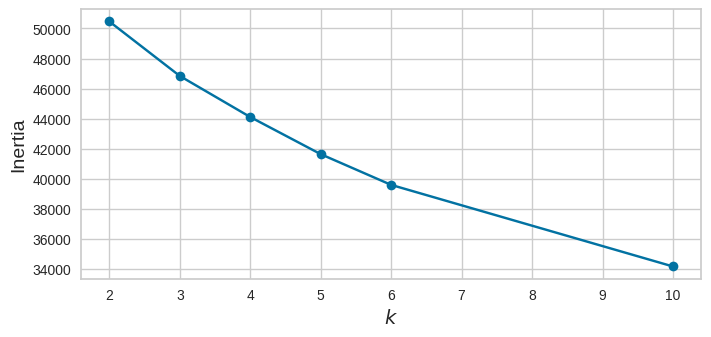

In [ ]:
c = [2, 3, 4, 5, 6, 10]
# Grader: I dropped 7, 8, and 9 from the list for computational efficiency.
# Please do not deduct mark if they include them.

kmeans_per_k = [KMeans(n_clusters=k, random_state=seed).fit(df) for k in c]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(c, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

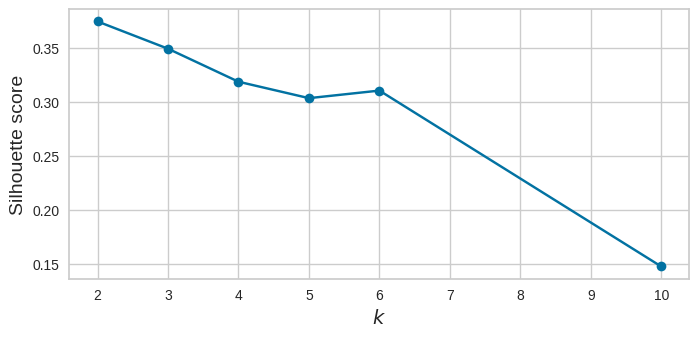

In [ ]:
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(c, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
print('The inertia plot is not that helpful as it is going down linearly and we cannot identify\n\
a reliable point of maximum curvature. However, the silhouette plot suggests ks of 2, 3, and 4.' )

The inertia plot is not that helpful as it is going down linearly and we cannot identify
a reliable point of maximum curvature. However, the silhouette plot suggests ks of 2, 3, and 4.


### Q 2.2 - <span style="color:red">[8]</span> - Plot the silhouette diagrams (*i.e.*, the stacked silhouette scores for clusters) for your choices of `k` made in the previous question. Do these help with further narrowing down you choices? Interpret the diagrams to support your answer.

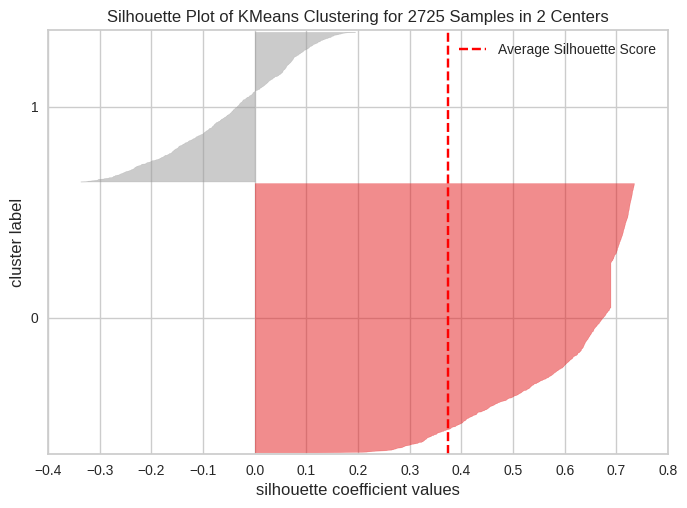

0.3740312758328632


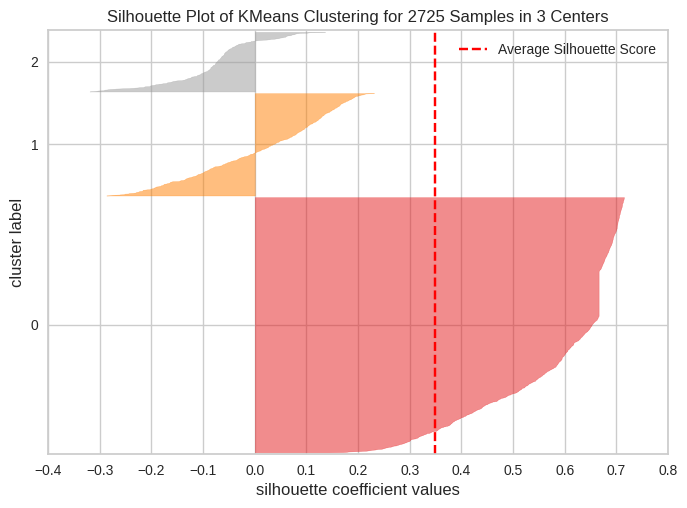

0.3488674652756403


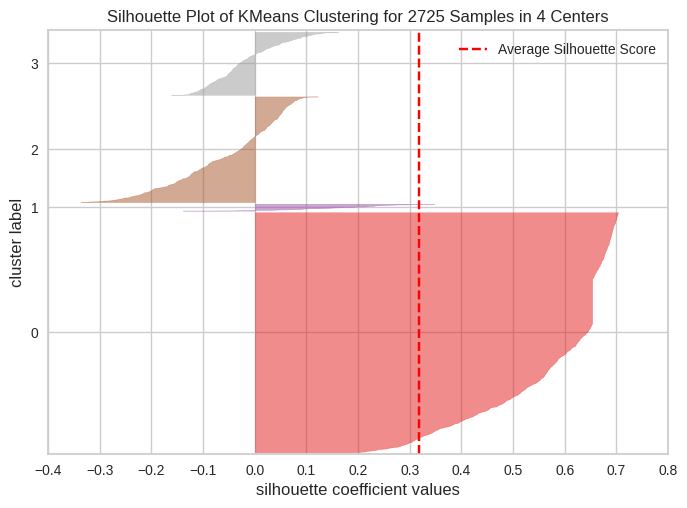

0.31841199344214466


In [ ]:
# Grader: The question asks to plot these only for the 3 choices of ke they made in Q2.1.
# Please do deduct mark if they plot it for less and/or more ks.
c2 = [2,3,4]

for k in c2:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(df)
  visualizer.show()
  print(silhouette_score(df, kmeans.labels_))
  plt.show()

In [ ]:
print('K=2 seems to be the one as it has the highest mean score and exhibits\n\
a more homogenous distribution between cluster size and distances.')

K=2 seems to be the one as it has the highest mean score and exhibits
a more homogenous distribution between cluster size and distances.


### Q 2.3 - <span style="color:red">[6]</span> - Plot a 2-component UMAP of the data and judge how many clusters do you see in there? Does this help with your quest? Taking this into account, what would be your choice(s) of `k` now?

(Use `n_jobs=-1`, `random_state=seed`, and leave all other parameters at their default values.)

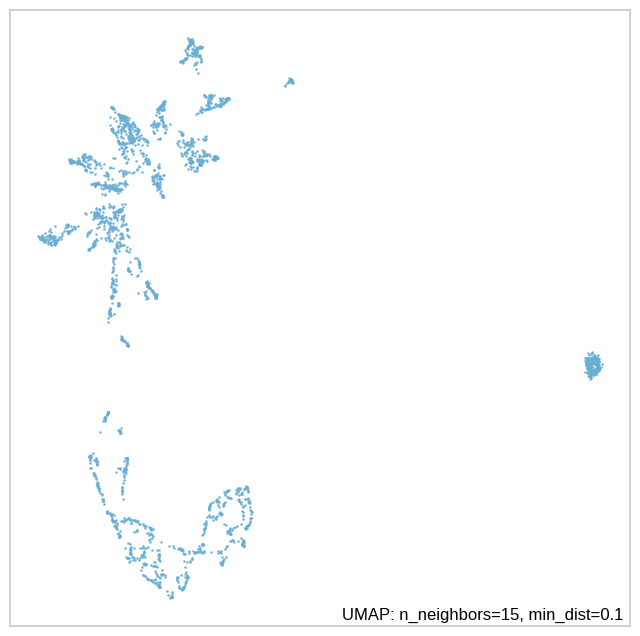

In [ ]:
# Grader: Please do deduct mark if you see extra (or fewer) arguments set for the UMAP (except n_jobs=-1).
reducer = umap.UMAP(
                    n_components=2, # It is fine if they do not include this, because the function's default value is 2
                    n_jobs=-1,
                    random_state=seed,
                   )

reducer.fit_transform(df)

umap.plot.points(reducer)
plt.show()

In [ ]:
# Grader: This can be a little bit subjective. They should be marked true as long as
# they write something relevant to what they see in the UMAP plot.
print('UMAP suggests 2 or 3 clusters, perhaps 2 is a better choice as it conforms with the previous\n\
observation from the silhouette analysis. This can be an extra evidence supporting 2.')

UMAP suggests 2 or 3 clusters, perhaps 2 is a better choice as it conforms with the previous
observation from the silhouette analysis. This can be an extra evidence supporting 2.


### Q 2.4 - <span style="color:red">[6]</span> - Plot a 2-component t-SNE (with a perplexity of 100) of the data and judge how many clusters do you see in there? Does this help with your quest?

(Use `n_jobs=-1`, `random_state=seed`, and leave the rest at their default values.)

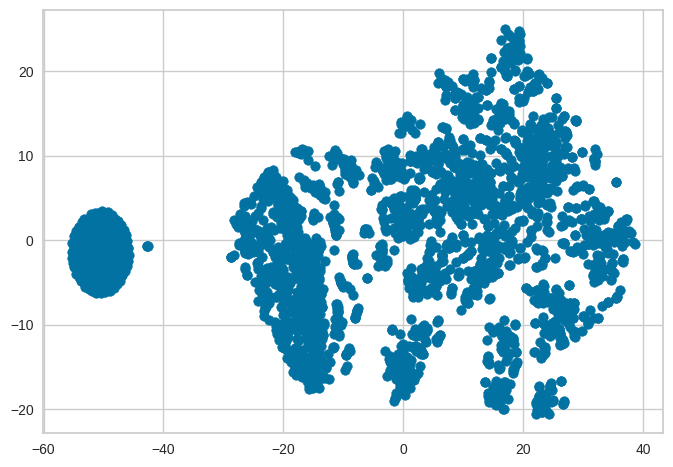

In [ ]:
# Grader: Please do deduct mark if you see extra (or less) arguments set for the TSNE (except n_jobs=-1).
tSNEmapper = TSNE(
                  n_components=2, # It is fine if they do not include this, because the function's default value is 2
                  perplexity=100.0,
                  random_state=seed,
                  n_jobs=-1,
                 )

TSNE_embedding = tSNEmapper.fit_transform(df)

# Grader: Even with the same seed, correct set-up of the data (in Q2.1) and the TSNE arguments,
# some of them might yet get a different plot. Please do not deduct mark for that.
plt.scatter(TSNE_embedding[:, 0], TSNE_embedding[:, 1])
plt.show()

In [ ]:
# Grader: Even with the same seed, correct set-up of the data (in Q2.1) and the TSNE arguments, some
# of them might yet get a different plot. Please judge their written answers based on their plots which
# might be different from ours.
print('I see 2 clusters, confirming previous observations.')

I see 2 clusters, confirming previous observations.


### Q 2.5 - <span style="color:red">[3]</span> - What number of clusters do you ultimately report?

In [ ]:
print('I would report 2 as long as that is a valid answer in the context of the project,\n\
otherwise, more clustering techniques to be explored to find a legitimate answer,\n\
conforming with domain knowledge.')

I would report 2 as long as that is a valid answer in the context of the project,
otherwise, more clustering techniques to be explored to find a legitimate answer,
conforming with domain knowledge.


---
# Warning!

After uploading your completed notebook to OWL, make sure to click the "Submit for Grading" button and confirm your submission. If your submission is successful, you should receive a confirmation email in your UWO inbox.

